In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline 
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# считываем данные, выводим первые 5 строк
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv', sep=",")
data.head()
target_col = 'DEATH_EVENT'

In [3]:
# размеры датасета
data.shape

(299, 13)

In [4]:
# столбцы
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# типы данных
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# проверим наличие пустых значений
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

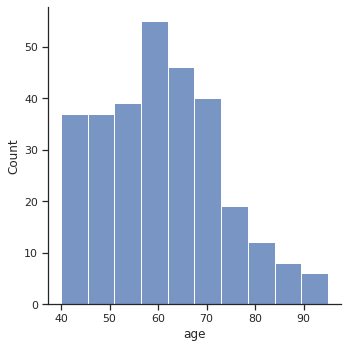

In [7]:
# для наглядности рассмотрим распределение по возрасту
sns.displot(data['age'])

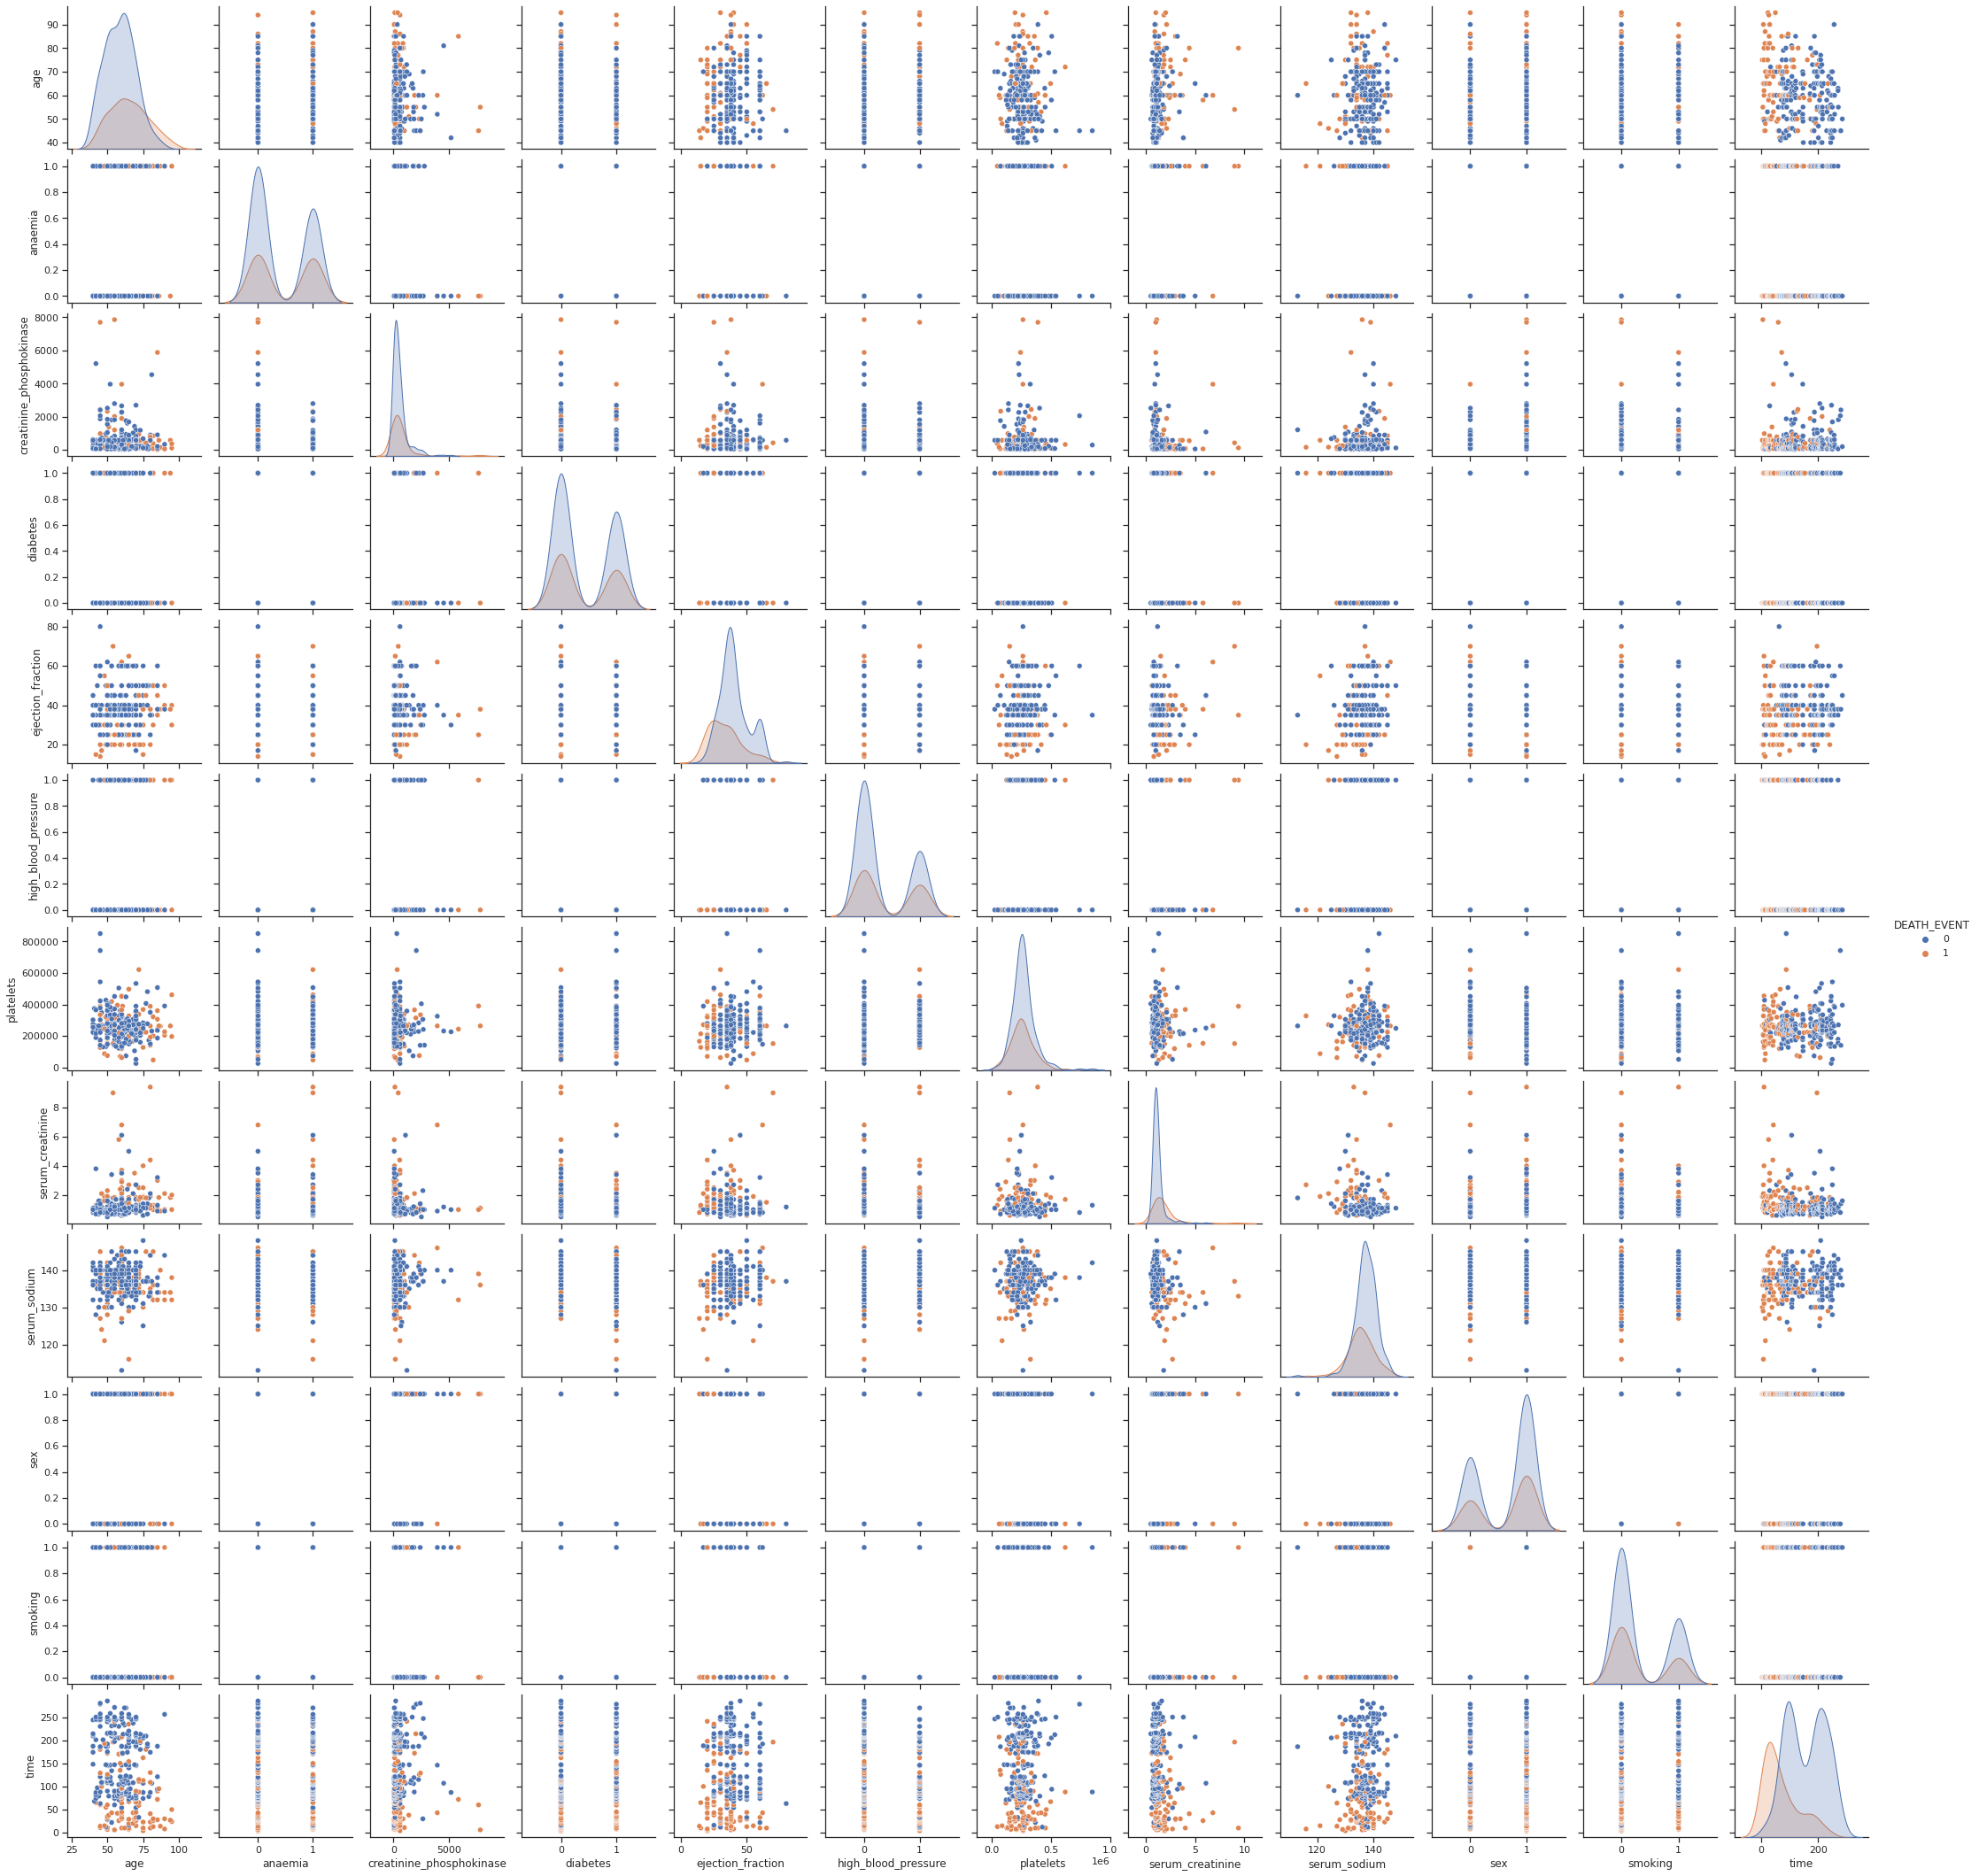

In [8]:
sns.pairplot(data, hue=target_col)

In [9]:
# убедимся, что целевой признак содержит только 0 и 1
data[target_col].unique()

array([1, 0])

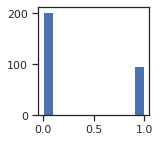

In [10]:
# оценим соотношение больных и здоровых
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(data[target_col])
plt.show()

In [11]:
data[target_col].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [12]:
total = data.shape[0]
class_0, class_1 = data[target_col].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 0 составляет 67.89%, а класс 1 составляет 32.11%.


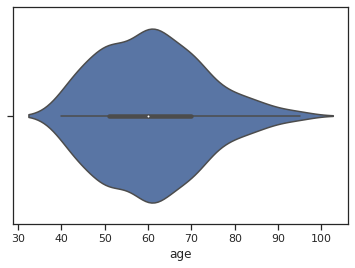

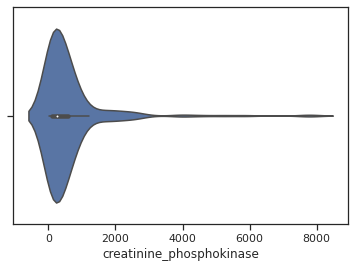

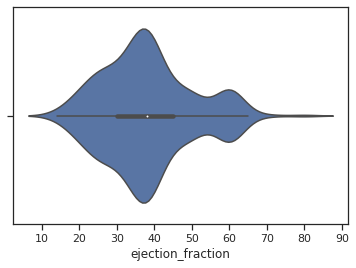

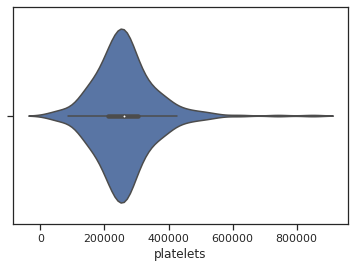

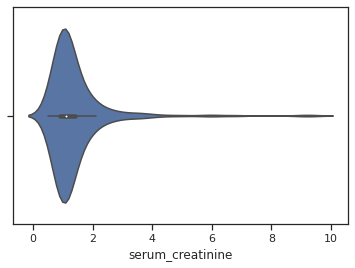

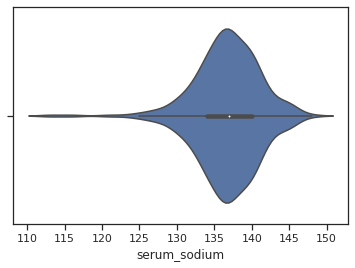

In [13]:
# скрипичные диаграммы для числовых колонок
for col in ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']:
    sns.violinplot(x=data[col])
    plt.show()

<AxesSubplot:>

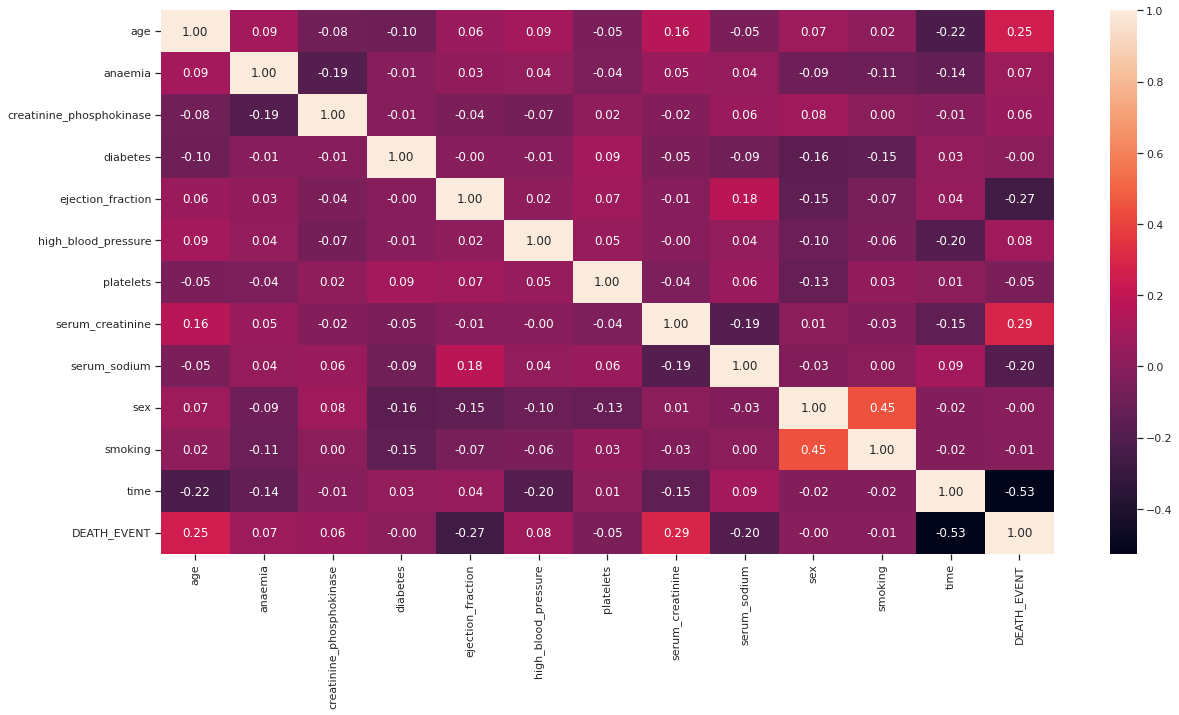

In [14]:
# построим корелляционную матрицу
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

In [15]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [16]:
# числовые колонки для масштабирования
scale_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# проведем масштабирование с помощью MinMaxScaler
data_scaled = data
sc = MinMaxScaler()
sc_data = sc.fit_transform(data_scaled[scale_cols])

# добавим новые колонки
for i in range(len(scale_cols)):
    col = scale_cols[i]
    col_name = col + '_scaled'
    data_scaled[col_name] = sc_data[:,i]

# удалим старые
data_scaled = data_scaled.drop(scale_cols, axis=1)
data_scaled.head()

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT,age_scaled,creatinine_phosphokinase_scaled,ejection_fraction_scaled,platelets_scaled,serum_creatinine_scaled,serum_sodium_scaled,time_scaled
0,0,0,1,1,0,1,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0,0,0,1,0,1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0,0,0,1,1,1,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,1,0,0,1,0,1,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,1,1,0,0,0,1,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


<AxesSubplot:>

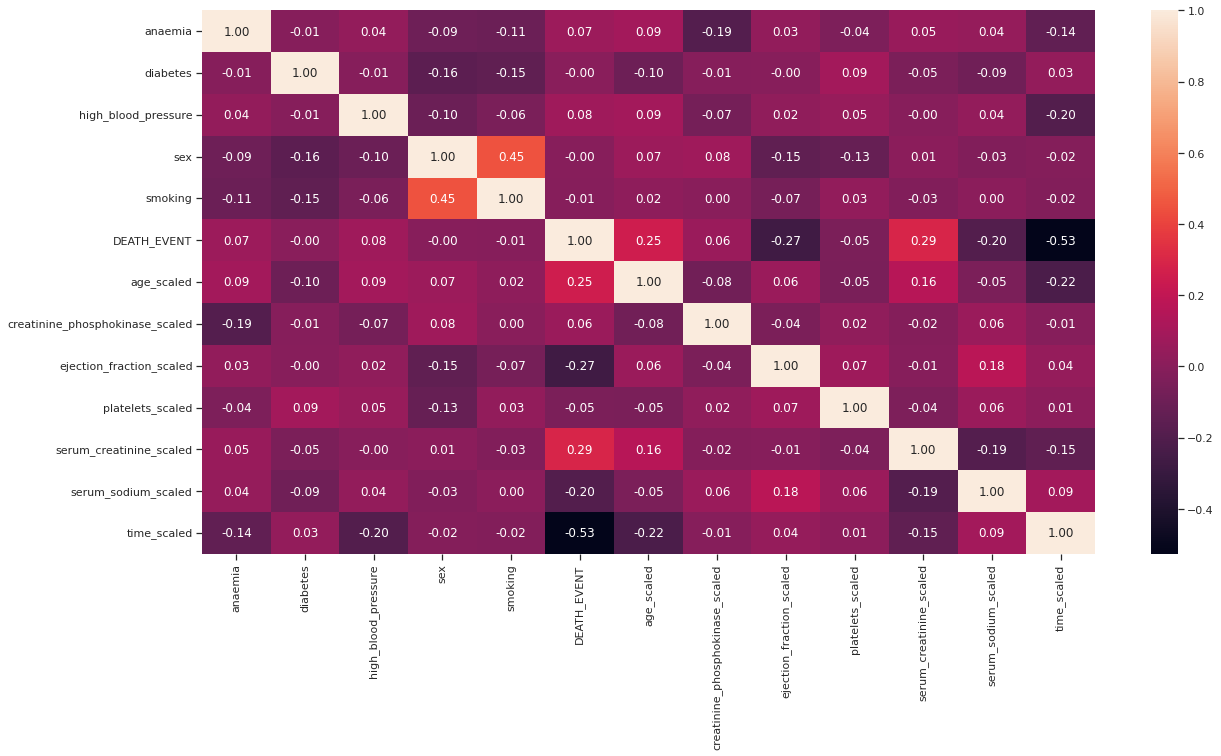

In [17]:
# построим новую корреляционную матрицу, которая должна совпадать со старой
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
sns.heatmap(data_scaled.corr(), annot=True, fmt='.2f')

In [18]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [19]:
X = data_scaled.drop(target_col, axis=1)
Y = data_scaled[target_col]

In [20]:
# разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2)
print('{}, {}'.format(x_train.shape, x_test.shape))
print('{}, {}'.format(y_train.shape, y_test.shape))

(209, 12), (90, 12)
(209,), (90,)


In [21]:
# модели
models =    {'LogisticRegression': LogisticRegression(),
            'KNearestNeighbors':KNeighborsClassifier(n_neighbors=3),
            'DecisionTree':DecisionTreeClassifier(),
            'RandomForest':RandomForestClassifier(),
            'GradientBoost':GradientBoostingClassifier()}

In [22]:
# сохранение метрик
clasMetricLogger = MetricLogger()

# отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, ax, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    #plt.figure()
    lw = 2
    ax.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_xlim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")

In [23]:
clas_X_train = x_train
clas_Y_train = y_train
clas_X_test = x_test
clas_Y_test = y_test

In [24]:
def clas_train_model(model_name, model, clasMetricLogger):
    model.fit(clas_X_train, clas_Y_train)
    # Предсказание значений
    Y_pred = model.predict(clas_X_test)
    # Предсказание вероятности класса "1" для roc auc
    Y_pred_proba_temp = model.predict_proba(clas_X_test)
    Y_pred_proba = Y_pred_proba_temp[:,1]
    
    precision = precision_score(clas_Y_test.values, Y_pred)
    recall = recall_score(clas_Y_test.values, Y_pred)
    f1 = f1_score(clas_Y_test.values, Y_pred)
    roc_auc = roc_auc_score(clas_Y_test.values, Y_pred_proba)
    
    clasMetricLogger.add('precision', model_name, precision)
    clasMetricLogger.add('recall', model_name, recall)
    clasMetricLogger.add('f1', model_name, f1)
    clasMetricLogger.add('roc_auc', model_name, roc_auc)

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))    
    draw_roc_curve(clas_Y_test.values, Y_pred_proba, ax[0])
    plot_confusion_matrix(model, clas_X_test, clas_Y_test.values, ax=ax[1],
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    fig.suptitle(model_name)
    plt.show()

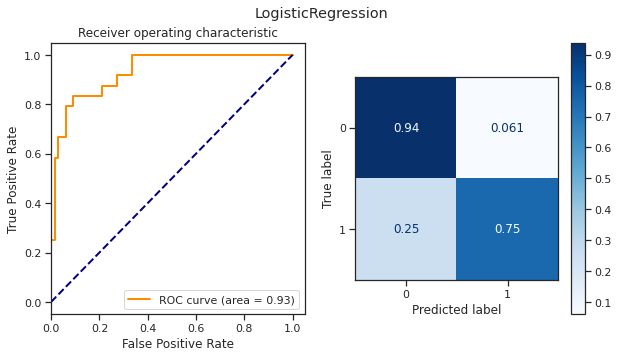

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.82      0.75      0.78        24

    accuracy                           0.89        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90

ROC AUC score: 0.9330808080808082
Accuracy Score:  0.8888888888888888


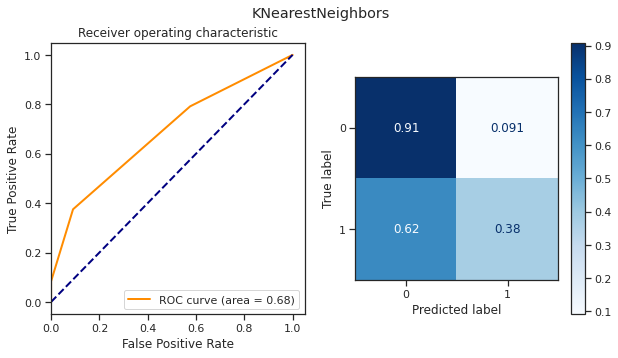

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        66
           1       0.60      0.38      0.46        24

    accuracy                           0.77        90
   macro avg       0.70      0.64      0.66        90
weighted avg       0.75      0.77      0.75        90

ROC AUC score: 0.6837121212121211
Accuracy Score:  0.7666666666666667


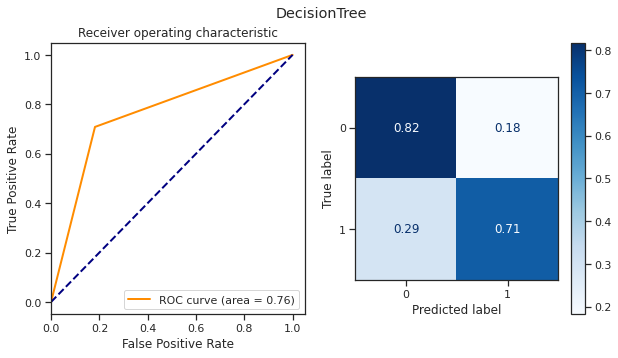

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        66
           1       0.59      0.67      0.63        24

    accuracy                           0.79        90
   macro avg       0.73      0.75      0.74        90
weighted avg       0.80      0.79      0.79        90

ROC AUC score: 0.75
Accuracy Score:  0.7888888888888889


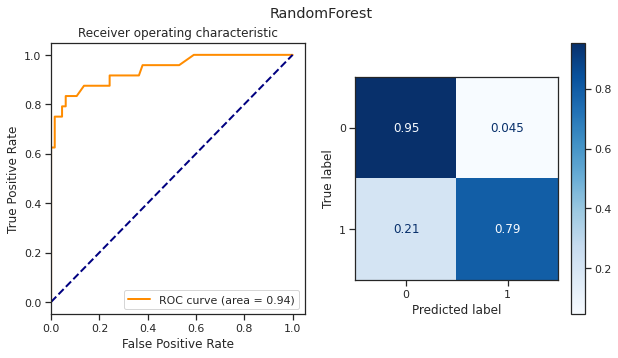

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.83      0.83      0.83        24

    accuracy                           0.91        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.91      0.91      0.91        90

ROC AUC score: 0.9368686868686869
Accuracy Score:  0.9111111111111111


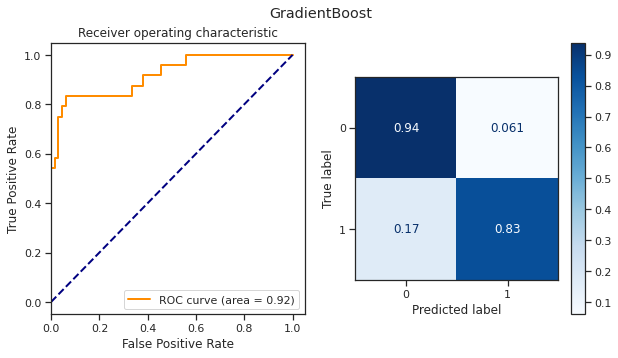

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        66
           1       0.83      0.83      0.83        24

    accuracy                           0.91        90
   macro avg       0.89      0.89      0.89        90
weighted avg       0.91      0.91      0.91        90

ROC AUC score: 0.9185606060606062
Accuracy Score:  0.9111111111111111


In [25]:
accuracies = {}

for model_name, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)


    clas_train_model(model_name, model, clasMetricLogger)


    print(classification_report(y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)*100
    accuracies[model_name] = acc

In [26]:
# подбор гиперпараметров

n_range_list = list(range(0,300,10))
n_range_list[0] = 1

KN_range_list = list(range(0,150,1))
KN_range_list[0] = 1

thirty_range_list = list(range(10,50,1))

grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
               (KNeighborsClassifier(),[{'n_neighbors':KN_range_list}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':n_range_list,'criterion':['gini','entropy'],'random_state':[0]}]),
               (GradientBoostingClassifier(),[{'n_estimators':n_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}])]


In [27]:
first_grid = GridSearchCV(LogisticRegression(),param_grid = [{'C':[0.25,0.5,0.75,1],'random_state':[0]}], scoring = 'accuracy',cv=5)
first_grid.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.25, 0.5, 0.75, 1], 'random_state': [0]}],
             scoring='accuracy')

In [28]:
first_grid.best_estimator_

LogisticRegression(C=1, random_state=0)

In [29]:
first_grid.best_score_

0.789198606271777

In [30]:
second_grid = GridSearchCV(KNeighborsClassifier(),param_grid = [{'n_neighbors':KN_range_list}], scoring = 'accuracy',cv=5)
second_grid.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]}],
             scoring='accuracy')

In [31]:
second_grid.best_estimator_

KNeighborsClassifier(n_neighbors=11)

In [32]:
second_grid.best_score_

0.7227642276422765

In [33]:
third_grid = GridSearchCV(DecisionTreeClassifier(),param_grid = [{'criterion':['gini','entropy'],'random_state':[0]}], scoring = 'accuracy',cv=5)
third_grid.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'random_state': [0]}],
             scoring='accuracy')

In [34]:
third_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
third_grid.best_score_

0.7943089430894309

In [36]:
fourth_grid = GridSearchCV(RandomForestClassifier(),param_grid = [{'n_estimators':thirty_range_list,'criterion':['gini','entropy'],'random_state':[0]}], scoring = 'accuracy',cv=5)
fourth_grid.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,
                                           28, 29, 30, 31, 32, 33, 34, 35, 36,
                                           37, 38, 39, ...],
                          'random_state': [0]}],
             scoring='accuracy')

In [37]:
fourth_grid.best_estimator_

RandomForestClassifier(n_estimators=40, random_state=0)

In [38]:
fourth_grid.best_score_

0.8371660859465736

In [39]:
fifth_grid = GridSearchCV(GradientBoostingClassifier(),param_grid = [{'n_estimators':thirty_range_list,'criterion':['friedman_mse','mse'],'loss':['deviance','exponential'],'learning_rate':[0.1, 0.5, 0.8, 1],'random_state':[0]}], scoring = 'accuracy',cv=5)
fifth_grid.fit(clas_X_train, clas_Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'criterion': ['friedman_mse', 'mse'],
                          'learning_rate': [0.1, 0.5, 0.8, 1],
                          'loss': ['deviance', 'exponential'],
                          'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20, 21, 22, 23, 24, 25, 26, 27,
                                           28, 29, 30, 31, 32, 33, 34, 35, 36,
                                           37, 38, 39, ...],
                          'random_state': [0]}],
             scoring='accuracy')

In [40]:
fifth_grid.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.8,
                           loss='exponential', n_estimators=35, random_state=0)

In [41]:
fifth_grid.best_score_

0.8181184668989546

In [42]:
# выведем лучшие параметры для каждой модели
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv=5)
    grid.fit(x_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('======================================================================')
    print('')

LogisticRegression():
Best Accuracy : 78.92%
Best Parameters :  {'C': 1, 'random_state': 0}


KNeighborsClassifier():
Best Accuracy : 72.28%
Best Parameters :  {'n_neighbors': 11}


DecisionTreeClassifier():
Best Accuracy : 79.43%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}


RandomForestClassifier():
Best Accuracy : 83.72%
Best Parameters :  {'criterion': 'gini', 'n_estimators': 40, 'random_state': 0}


GradientBoostingClassifier():
Best Accuracy : 81.31%
Best Parameters :  {'criterion': 'friedman_mse', 'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 40, 'random_state': 0}




In [43]:
# составляем модели с полученными параметрами
best_models = {  'LogisticRegression': LogisticRegression(C = 1, random_state= 0),
            'KNearestNeighbors': KNeighborsClassifier(n_neighbors=11),
            'DecisionTree': DecisionTreeClassifier(criterion='entropy',random_state=0),
            'RandomForest': RandomForestClassifier(criterion='gini',n_estimators=40,random_state=0),
            'GradientBoost': GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.5,loss='exponential',n_estimators=40,random_state=0)}

best_accuracies = {}

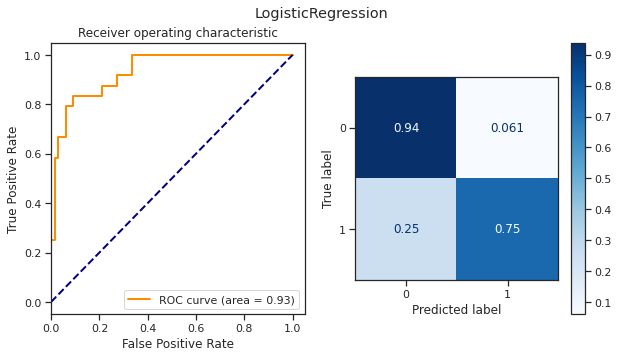

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        66
           1       0.82      0.75      0.78        24

    accuracy                           0.89        90
   macro avg       0.86      0.84      0.85        90
weighted avg       0.89      0.89      0.89        90

ROC AUC score: 0.9330808080808082
Accuracy Score:  0.8888888888888888


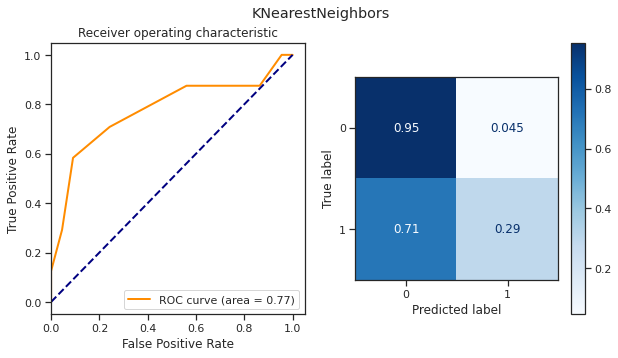

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        66
           1       0.70      0.29      0.41        24

    accuracy                           0.78        90
   macro avg       0.74      0.62      0.64        90
weighted avg       0.76      0.78      0.74        90

ROC AUC score: 0.7749368686868687
Accuracy Score:  0.7777777777777778


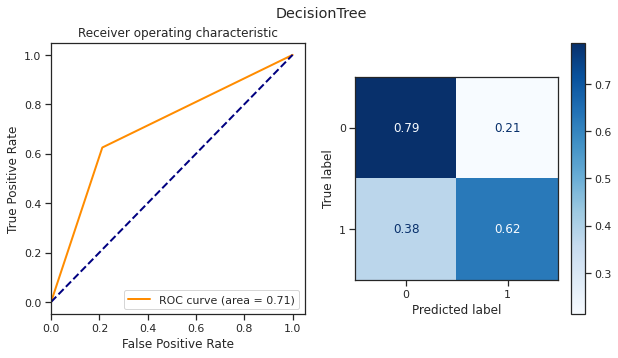

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        66
           1       0.52      0.62      0.57        24

    accuracy                           0.74        90
   macro avg       0.68      0.71      0.69        90
weighted avg       0.76      0.74      0.75        90

ROC AUC score: 0.7064393939393939
Accuracy Score:  0.7444444444444445


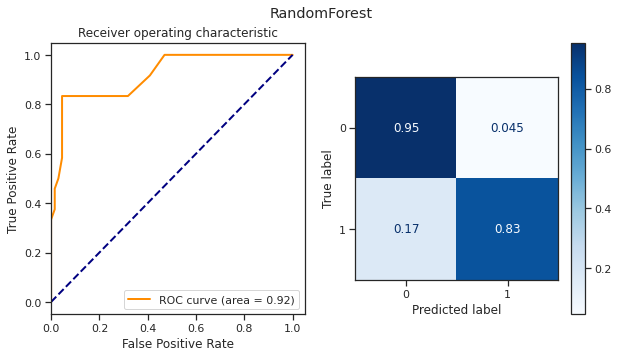

              precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.87      0.83      0.85        24

    accuracy                           0.92        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.92      0.92      0.92        90

ROC AUC score: 0.9160353535353536
Accuracy Score:  0.9222222222222223


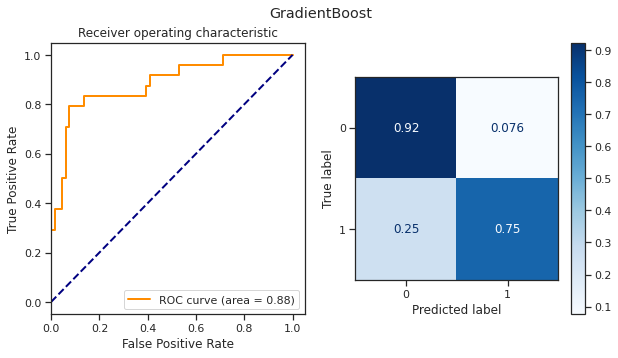

              precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.78      0.75      0.77        24

    accuracy                           0.88        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.88      0.88      0.88        90

ROC AUC score: 0.8832070707070707
Accuracy Score:  0.8777777777777778


In [44]:
# выводим результаты 
for model_name, model in best_models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]
    cm = confusion_matrix(y_test, y_pred)


    clas_train_model(model_name, model, clasMetricLogger)

    print(classification_report(y_test, y_pred))
    print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))

    acc = accuracy_score(y_test, y_pred)*100
    best_accuracies[model_name] = acc

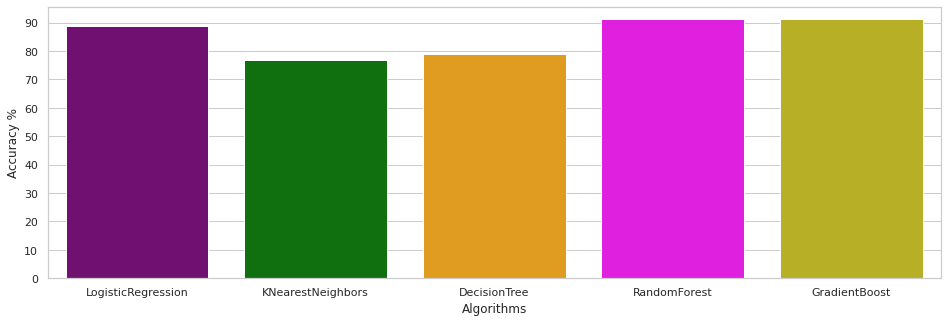

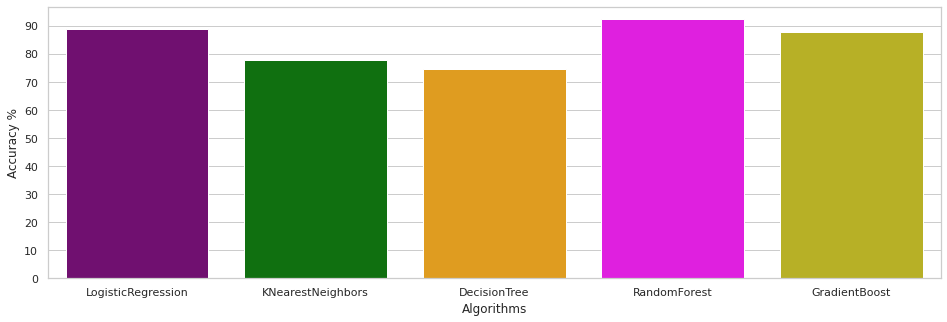

In [45]:
# сравним результаты моделей с помощью гистограмм

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'#417D7A','#066163','#4D4C7D']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(best_accuracies.keys()), y=list(best_accuracies.values()), palette=colors)
plt.show()